In [1]:
#Libraries to use
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from prettytable import PrettyTable

# Data Cleaning and Checking

In [3]:
#We load the .csv and visualize the first ten rows of it, we can also see the columns name
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#Now let's check the dataset shape so we can see the number of rows and columns
df.shape

(1599, 12)

In [5]:
#Replace spaces with _ for each column
df.columns = df.columns.str.replace(' ', '_')

In [6]:
#We check there are no missing values and no object data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Exploration

C:\Users\Lovely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

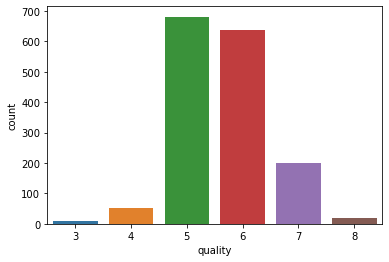

In [7]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(df['quality'])
df['quality'].value_counts()

In [8]:
#Calculate and order correlations
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

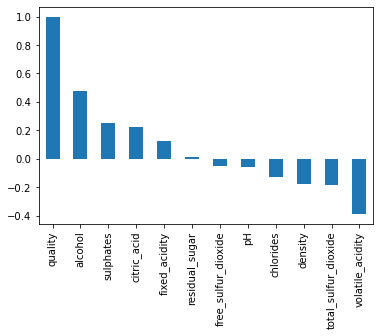

In [9]:
correlations.plot(kind='bar')

<AxesSubplot:>

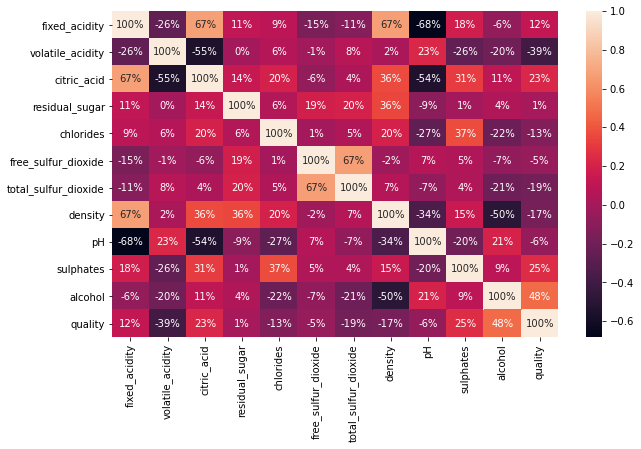

In [10]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [11]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


### Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

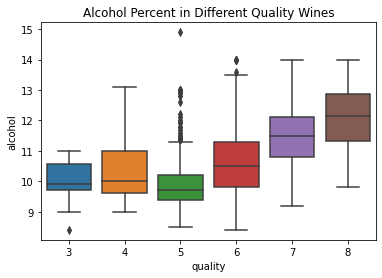

In [12]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

In [13]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [14]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric_acid             0.080146
fixed_acidity           0.053447
pH                      0.043065
residual_sugar         -0.018452
free_sulfur_dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile_acidity       -0.237193
total_sulfur_dioxide   -0.239067
Name: quality, dtype: float64


### Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

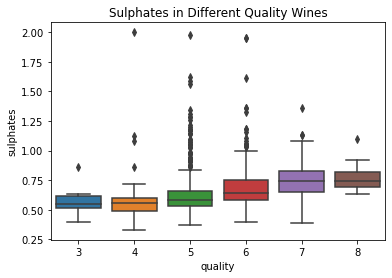

In [15]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

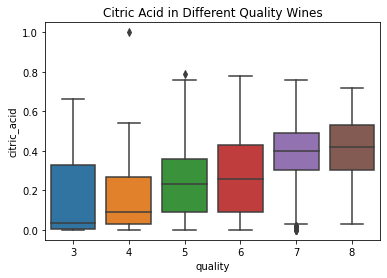

In [16]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

### Acetic Acid Presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

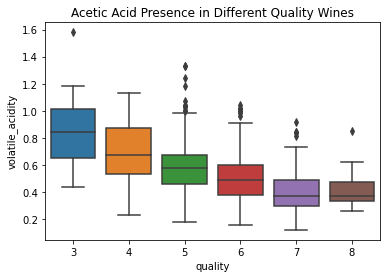

In [17]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

### More data visualization

In [18]:
#We make a copy of our dataframe and group quality in differnt groups
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

C:\Users\Lovely\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

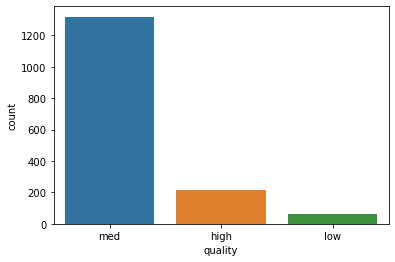

In [19]:
sns.countplot(df_aux['quality'])

### Feature Selection

In [21]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

### Regression Models

In [22]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Linear Regression

In [23]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

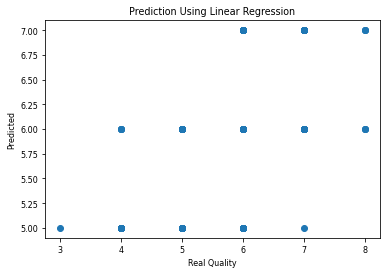

In [24]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

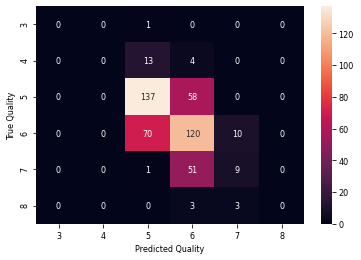

In [25]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Decision Tree Regressor

In [26]:
#Fit the model and make prediction
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

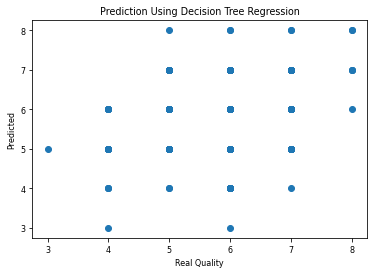

In [27]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

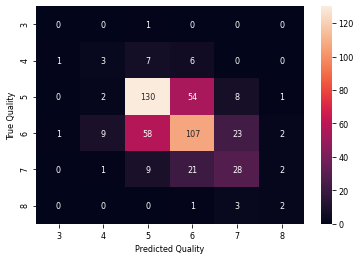

In [28]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Random Forest Regressor

In [29]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

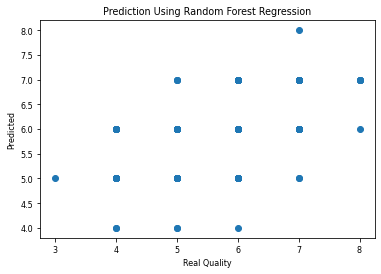

In [30]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()


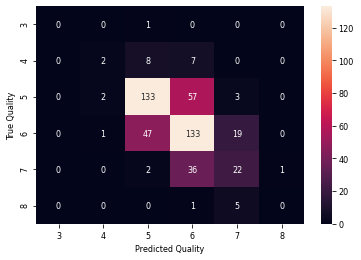

In [31]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');


### RMSE of Models

#### Linear Regression RMSE

In [34]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.7085783889827104


#### Decision Tree Regressor RMSE

In [35]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.8440971508067067


#### Random Forest Regression RMSE

In [36]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.699702317656111


### Improving the results with 1-Off Accuray

In [37]:
def one_accuracy(predicted, true):
 i = 0
 for x,y in zip(predicted,true):
  if(abs(x-y)==1):
   predicted[i] = y
  i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

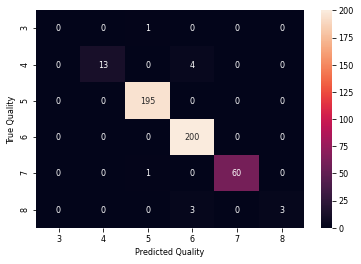

In [38]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

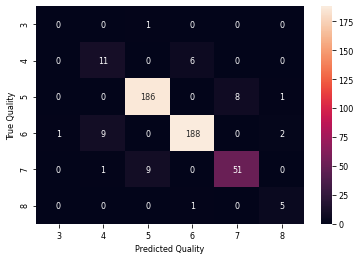

In [39]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

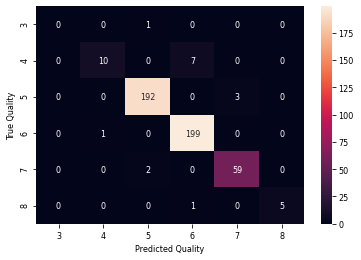

In [40]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [41]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.27386127875258304

RMSE for new improved Decision Tree Regression is: 0.5968668193156661

RMSE for new improved Random Forest Regression is: 0.3535533905932738



### Testing Our Models with Precision, Recall and F1 Score

In [42]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+---------+--------------------+
| Regressor Model |     Precision      |  Recall |      F1Score       |
+-----------------+--------------------+---------+--------------------+
|      Linear     | 0.9797021240507777 | 0.98125 | 0.9787385410477942 |
|  Decision Tree  | 0.9234481431099167 | 0.91875 | 0.9205872147073062 |
|  Random Forest  | 0.9661947165672622 | 0.96875 | 0.9660315070376045 |
+-----------------+--------------------+---------+--------------------+
